### Author: Hemanth Mydugolam
### Forecasting in python
#### Why do we need time series Analysis?
Time series analysis helps organizations understand the underlying causes of trends or systemic patterns over time. Using data visualizations, business users can see seasonal trends and dig deeper into why these trends occur. With modern analytics platforms, these visualizations can go far beyond line graphs.

#### Why do we need time series forecasting?
Time series forecasting is a data science technique that uses historical and current data to predict future values. Its a part of predictive analytics that can help organizations make informed decisions, guide business strategy, and understand future trends.

Firstly, we will discuss the normal regression prediction using xgboost to predict the future data after that we will discuss the classical forecasting techniques.

#### Types of forecasting
There are different classical time series forecasting methods, which are as follows:
1. Autoregression (AR)
2. Moving Average (MA)
3. Autoregressive Moving Average (ARMA)
4. Autoregressive Integrated Moving Average (ARIMA)
5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)
6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
7. Vector Autoregression (VAR)
8. Vector Autoregression Moving-Average (VARMA)
9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
10. Simple Exponential Smoothing (SES)
11. Holt Winter’s Exponential Smoothing (HWES)


#### Energy consumption dataset
We are going to analyze the American Electric Power energy consumption dataset taken from Kaggale for this entire analysis.

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#### Common time series data patterns
<img src="Timeseries data types.png">

Reference: https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467

In [2]:
# reading the energy consumption data
energy_cons_df = pd.read_csv('AEP_hourly.csv')

In [3]:
energy_cons_df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
energy_cons_df = energy_cons_df.set_index('Datetime')
energy_cons_df.index = pd.to_datetime(energy_cons_df.index)

In [5]:
energy_cons_df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


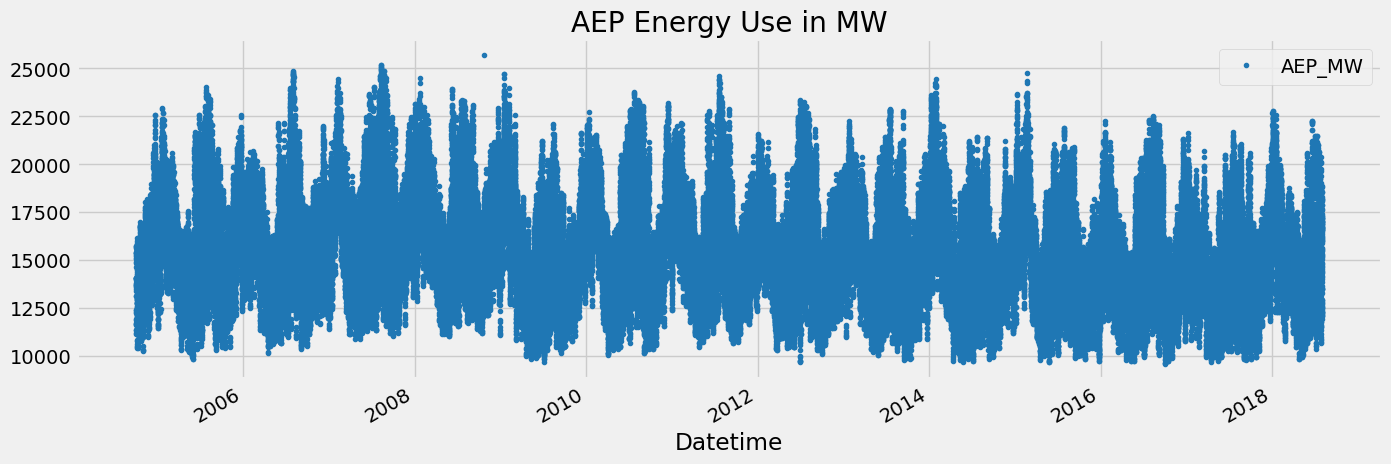

In [6]:
# lets plot the data and see
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

energy_cons_df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='AEP Energy Use in MW')
plt.show()

In [7]:
## create a backup of data
energy_cons_df_backup = energy_cons_df
## Data features creation
energy_cons_df['hour'] = energy_cons_df.index.hour
energy_cons_df['dayofweek'] = energy_cons_df.index.dayofweek
energy_cons_df['quarter'] = energy_cons_df.index.quarter
energy_cons_df['month'] = energy_cons_df.index.month
energy_cons_df['year'] = energy_cons_df.index.year
energy_cons_df['dayofyear'] = energy_cons_df.index.dayofyear
energy_cons_df['dayofmonth'] = energy_cons_df.index.day
energy_cons_df['weekofyear'] = energy_cons_df.index.isocalendar().week

In [8]:
energy_cons_df.head()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53


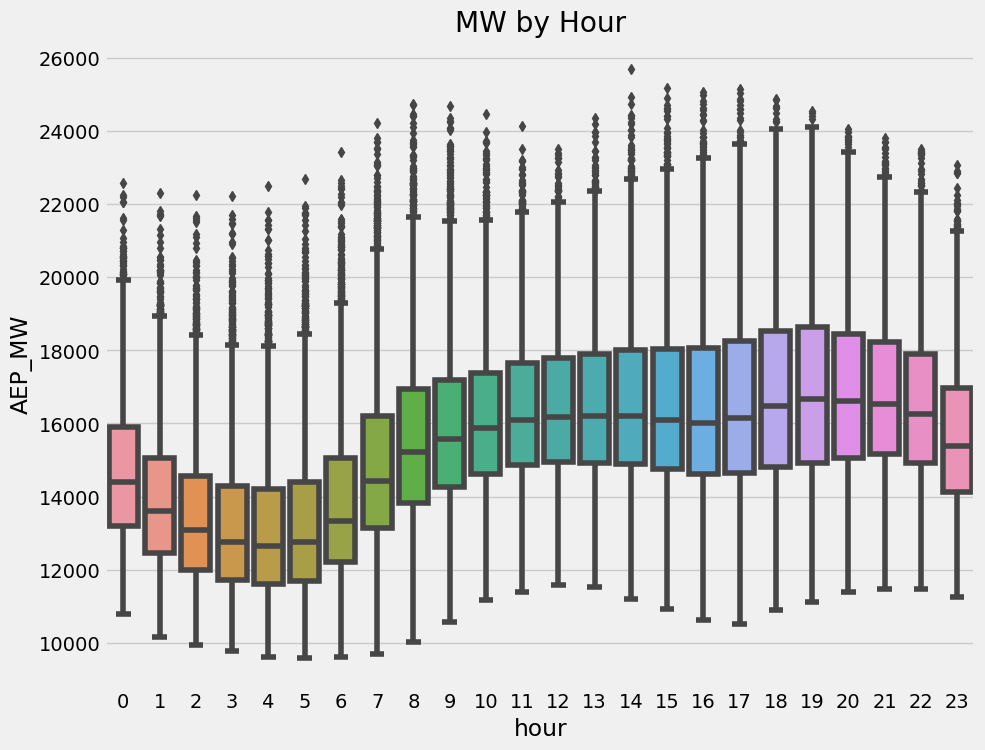

In [9]:
# Exploratory data Analysis
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=energy_cons_df, x='hour', y='AEP_MW')
ax.set_title('MW by Hour')
plt.show()

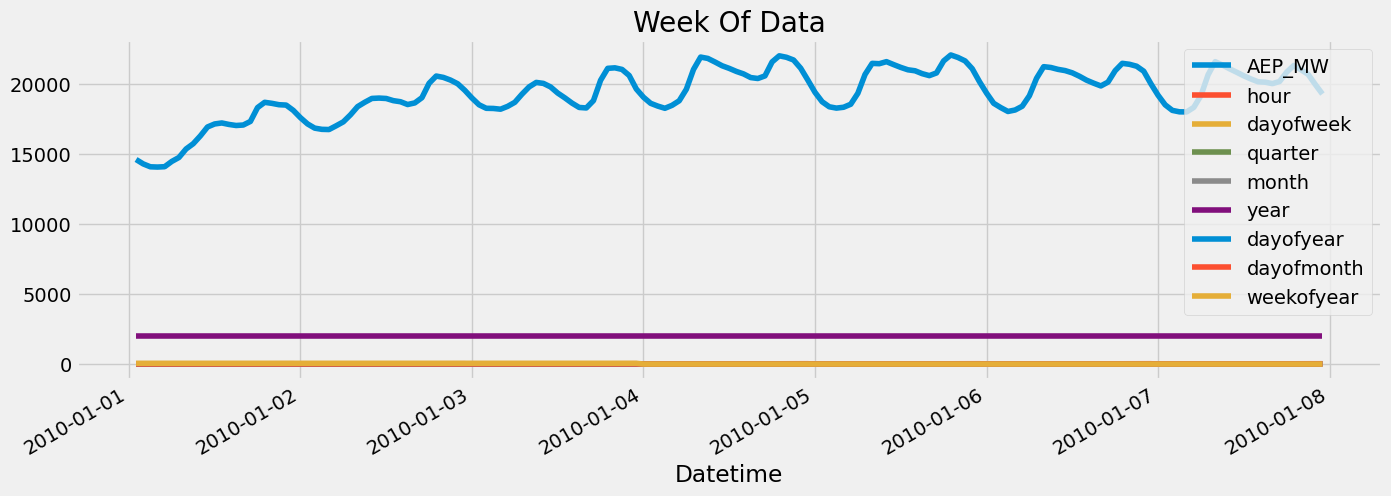

In [13]:
energy_cons_df.loc[(energy_cons_df.index > '01-01-2010') & (energy_cons_df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

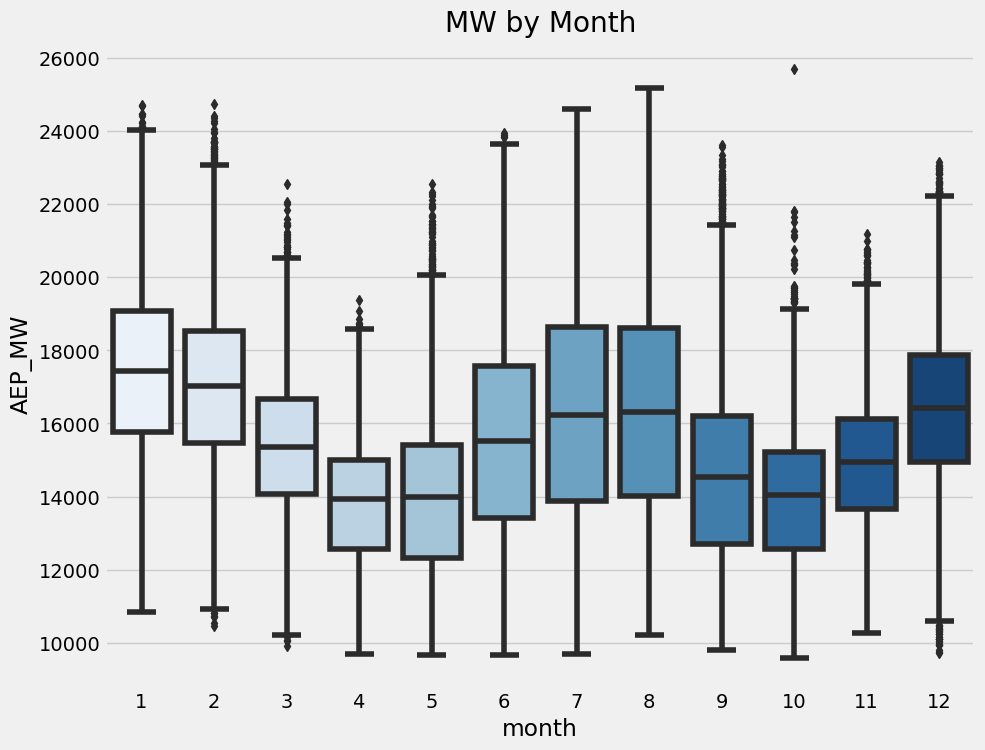

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=energy_cons_df, x='month', y='AEP_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

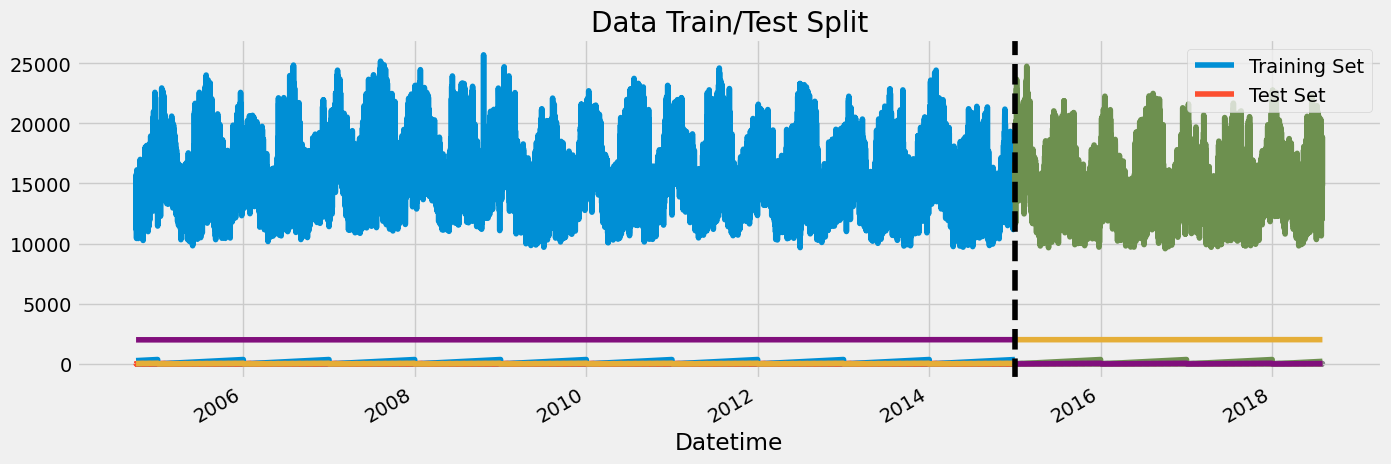

In [12]:
# Train and Test split
train = energy_cons_df.loc[energy_cons_df.index < '01-01-2015']
test = energy_cons_df.loc[energy_cons_df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [15]:
energy_cons_df.head()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53


In [16]:
# creating the model

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [17]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:15793.26088	validation_1-rmse:14861.30012


/Users/hemanth/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:05:11] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:6033.92025	validation_1-rmse:5144.77002
[200]	validation_0-rmse:2703.71020	validation_1-rmse:2159.54200
[300]	validation_0-rmse:1754.92809	validation_1-rmse:1667.43143
[393]	validation_0-rmse:1525.95027	validation_1-rmse:1657.89627


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

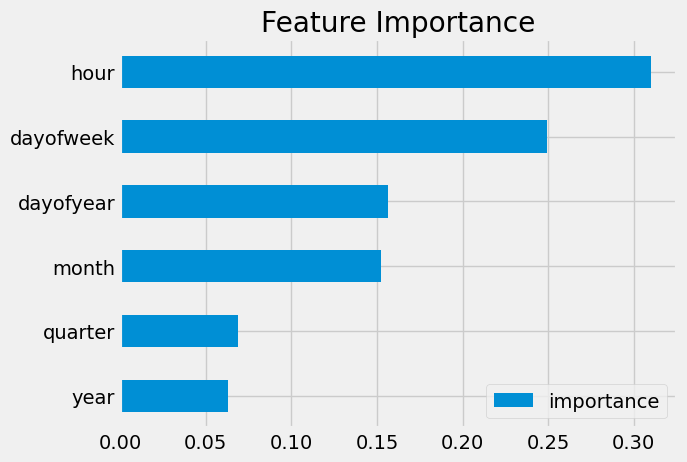

In [18]:
# feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [21]:
# Forecast on Test
test['prediction'] = reg.predict(X_test)

/var/folders/wn/7pk9xgxs173_4ytml2mrz3c00000gn/T/ipykernel_25021/2799007643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [22]:
test.head()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
Datetime,,,,,,,,,,
2015-01-01 00:00:00,16375.0,0,3,1,1,2015,1,1,1,15795.955078
2015-12-31 01:00:00,12415.0,1,3,4,12,2015,365,31,53,14634.876953
2015-12-31 02:00:00,12087.0,2,3,4,12,2015,365,31,53,14282.745117
2015-12-31 03:00:00,12010.0,3,3,4,12,2015,365,31,53,14282.745117
2015-12-31 04:00:00,11972.0,4,3,4,12,2015,365,31,53,14282.745117


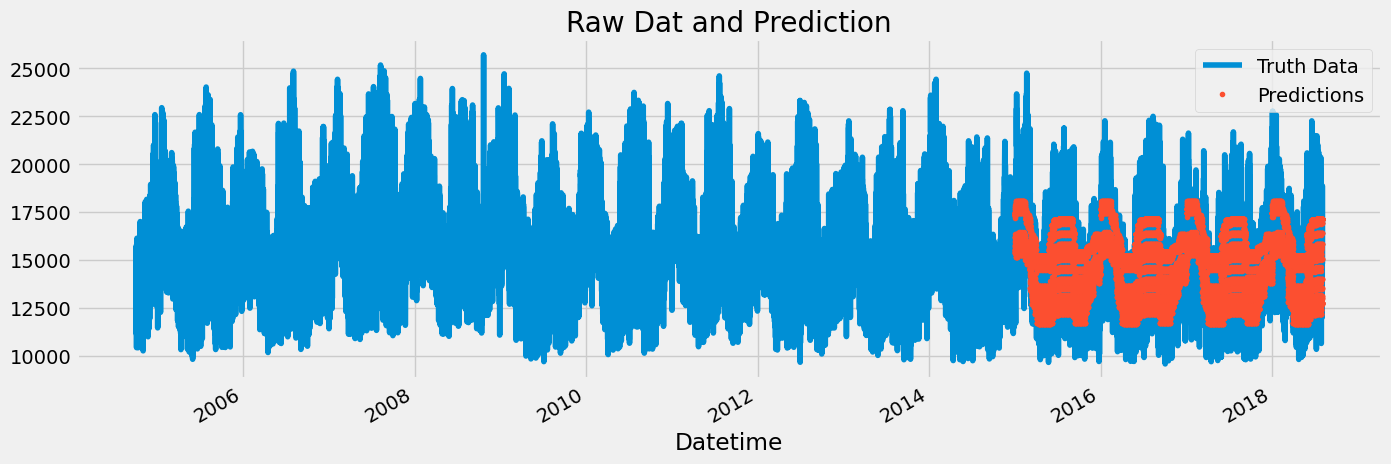

In [23]:
energy_cons_df = energy_cons_df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = energy_cons_df[['AEP_MW']].plot(figsize=(15, 5))
energy_cons_df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

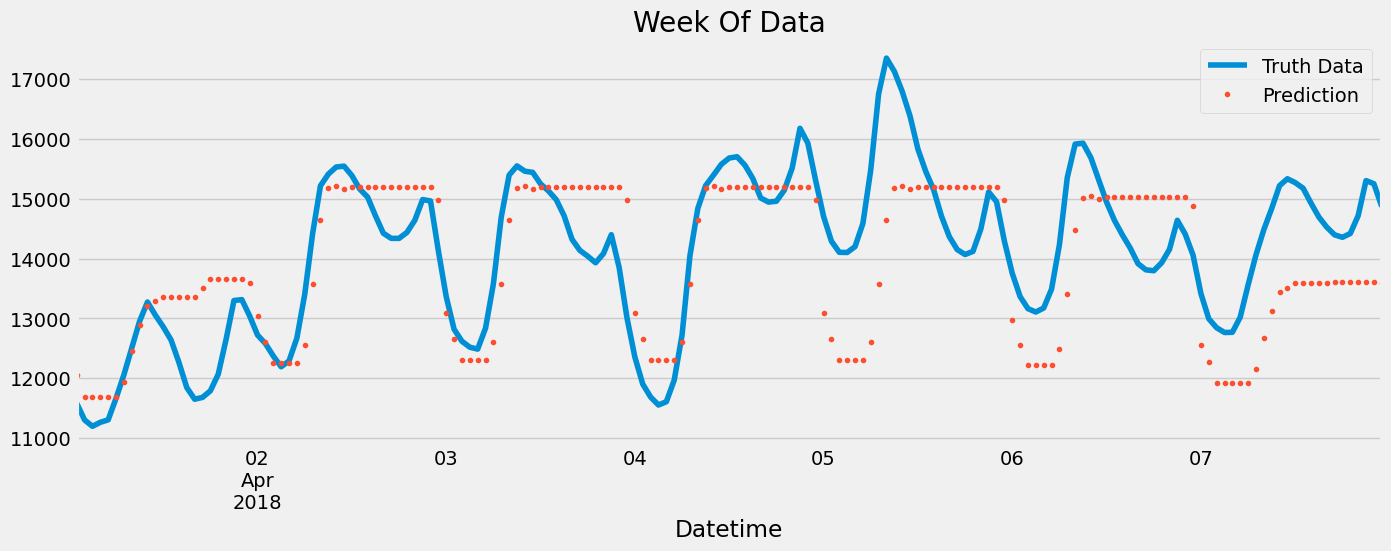

In [24]:
# week data
ax = energy_cons_df.loc[(energy_cons_df.index > '04-01-2018') & (energy_cons_df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
energy_cons_df.loc[(energy_cons_df.index > '04-01-2018') & (energy_cons_df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [25]:
# model evealuation
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on the test dataset: {score:0.2f}')

RMSE Score on the test dataset: 1649.42


In [26]:
# calculating errors and validating the maximum errors and respective time points
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

/var/folders/wn/7pk9xgxs173_4ytml2mrz3c00000gn/T/ipykernel_25021/2850165375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['prediction'])
/var/folders/wn/7pk9xgxs173_4ytml2mrz3c00000gn/T/ipykernel_25021/2850165375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


date
2015-02-19    5630.352132
2015-02-20    5394.673665
2018-01-06    4823.354574
2015-01-08    4703.830404
2015-12-25    4415.192912
2015-02-16    4411.147461
2015-12-24    4138.202759
2015-02-15    4079.741536
2018-01-05    4044.314657
2018-01-07    4037.638062
Name: error, dtype: float64